In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('Complete_Variance_Report_Waste_2022.xlsx')
df.head()

,Category,Inventory_Item,Pack_Size,Price_Per_Unit,Open_Count,Purchases,Transfers,Close_Count,Actual_Units,Theoretical_Units,Waste_Units,Variance_Units,Actual_Cost,Theoretical_Cost,Waste_Cost,$ Var,Variance_Percentage
0,Bagels,Bagel - 12 Grain,Case/78,29.88,0.0,0.0,20.79,0.0,20.79,0.0,21.46,-0.66,588.18,0.0,203.17,385.01,0.05
1,Bagels,Bagel -\nCinnamon Raisin,Case/78,29.50,0.0,0.0,20.79,0.0,20.79,0.0,20.28,0.51,588.18,0.0,195.55,392.63,0.05
2,Bagels,Bagel -\nEverything,Case/78,29.50,0.0,0.0,21.41,0.0,21.41,0.0,9.60,11.81,604.67,0.0,107.28,497.39,0.06
3,Bagels,Bagel - Four\nCheese,Case/78,46.01,0.0,0.0,11.46,0.0,11.46,0.0,7.60,3.87,483.13,0.0,122.73,360.40,0.05
4,Bagels,Bagel - Jalapeno\nAsiago,Case/78,45.65,0.0,0.0,8.31,0.0,8.31,0.0,2.78,5.53,328.61,0.0,38.35,290.26,0.04


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Category             207 non-null    object 
 1   Inventory_Item       207 non-null    object 
 2   Pack_Size            207 non-null    object 
 3   Price_Per_Unit       207 non-null    float64
 4   Open_Count           207 non-null    float64
 5   Purchases            207 non-null    float64
 6   Transfers            207 non-null    float64
 7   Close_Count          207 non-null    float64
 8   Actual_Units         207 non-null    float64
 9   Theoretical_Units    207 non-null    float64
 10  Waste_Units          207 non-null    float64
 11  Variance_Units       207 non-null    float64
 12  Actual_Cost          207 non-null    float64
 13  Theoretical_Cost     207 non-null    float64
 14  Waste_Cost           207 non-null    float64
 15  $ Var                207 non-null    flo

In [4]:
df.isnull().sum()

Category               0
Inventory_Item         0
Pack_Size              0
Price_Per_Unit         0
Open_Count             0
Purchases              0
Transfers              0
Close_Count            0
Actual_Units           0
Theoretical_Units      0
Waste_Units            0
Variance_Units         0
Actual_Cost            0
Theoretical_Cost       0
Waste_Cost             0
$ Var                  0
Variance_Percentage    0
dtype: int64

In [5]:
df.describe()

,Price_Per_Unit,Open_Count,Purchases,Transfers,Close_Count,Actual_Units,Theoretical_Units,Waste_Units,Variance_Units,Actual_Cost,Theoretical_Cost,Waste_Cost,$ Var,Variance_Percentage
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,49.007536,0.859758,11.428986,35.075217,0.693913,46.670048,38.284783,5.096618,3.289517,942.314010,496.338454,19.248116,426.727440,0.055507
std,32.237076,6.655523,98.754868,251.319352,4.361678,275.900418,269.887968,32.469581,36.893285,3669.458814,2603.008227,49.362467,1487.893445,0.193951
min,0.000000,0.000000,0.000000,-16.000000,0.000000,-1.000000,-1.000000,0.000000,-162.680000,-6.960000,-6.960000,0.000000,-129.220000,-0.020000
25%,29.500000,0.000000,0.000000,0.980000,0.000000,1.235000,0.000000,0.000000,-0.345000,30.380000,0.000000,0.000000,0.000000,0.000000
50%,44.160000,0.050000,0.000000,4.750000,0.080000,5.150000,1.500000,0.000000,0.000000,141.830000,30.180000,0.000000,26.870000,0.000000
75%,58.815000,0.250000,0.000000,14.180000,0.280000,16.665000,8.985000,0.320000,1.410000,538.350000,181.300000,9.105000,275.455000,0.035000
max,202.790000,93.750000,1201.140000,3563.250000,60.820000,3656.250000,3656.250000,329.000000,416.720000,36387.680000,32736.840000,302.350000,18575.340000,2.420000


## Univariate Analysis

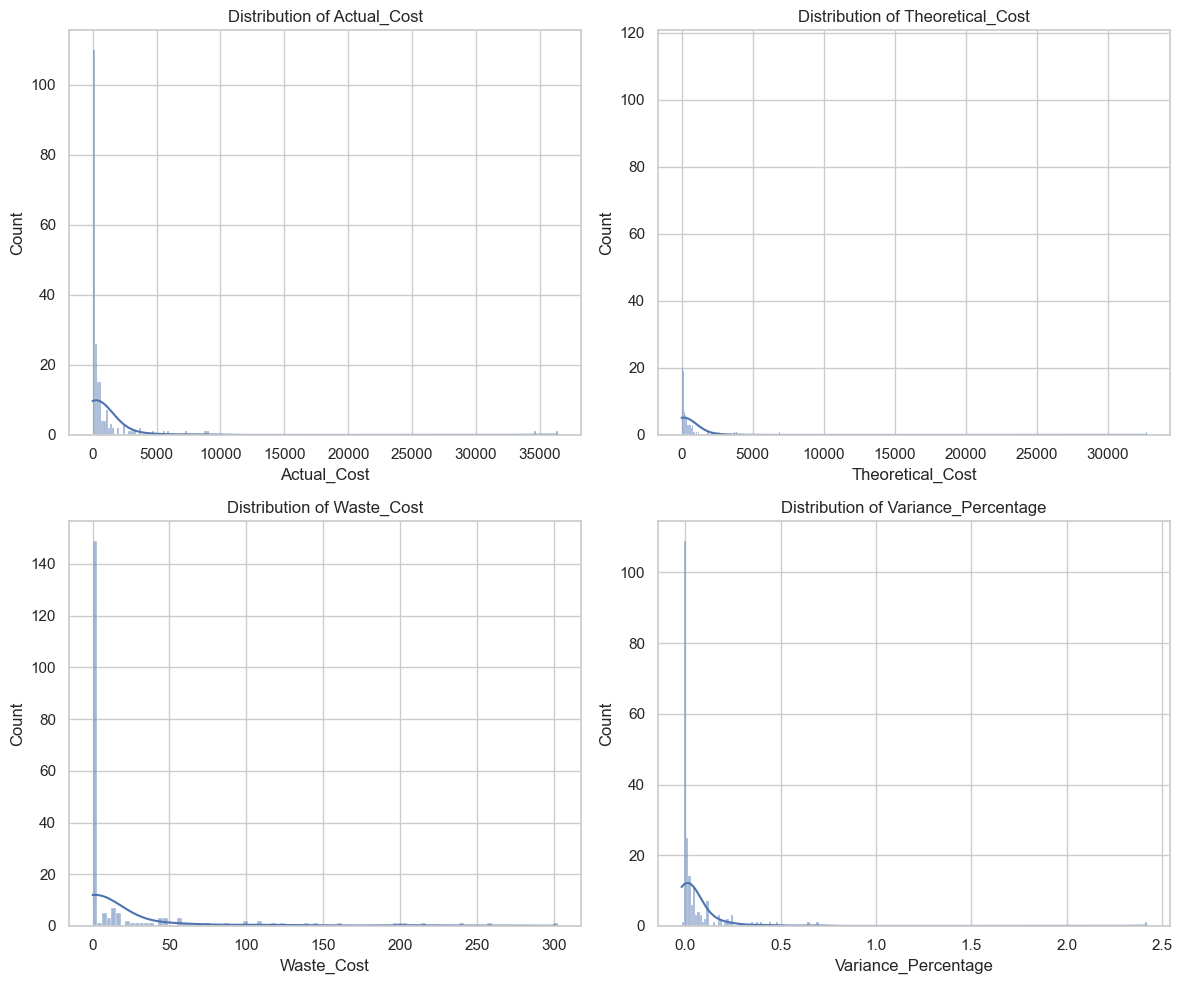

In [6]:
sns.set(style="whitegrid")

numerical_columns = ['Actual_Cost', 'Theoretical_Cost', 'Waste_Cost', 'Variance_Percentage']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, col in enumerate(numerical_columns):
    ax = axes[i // 2, i % 2]
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

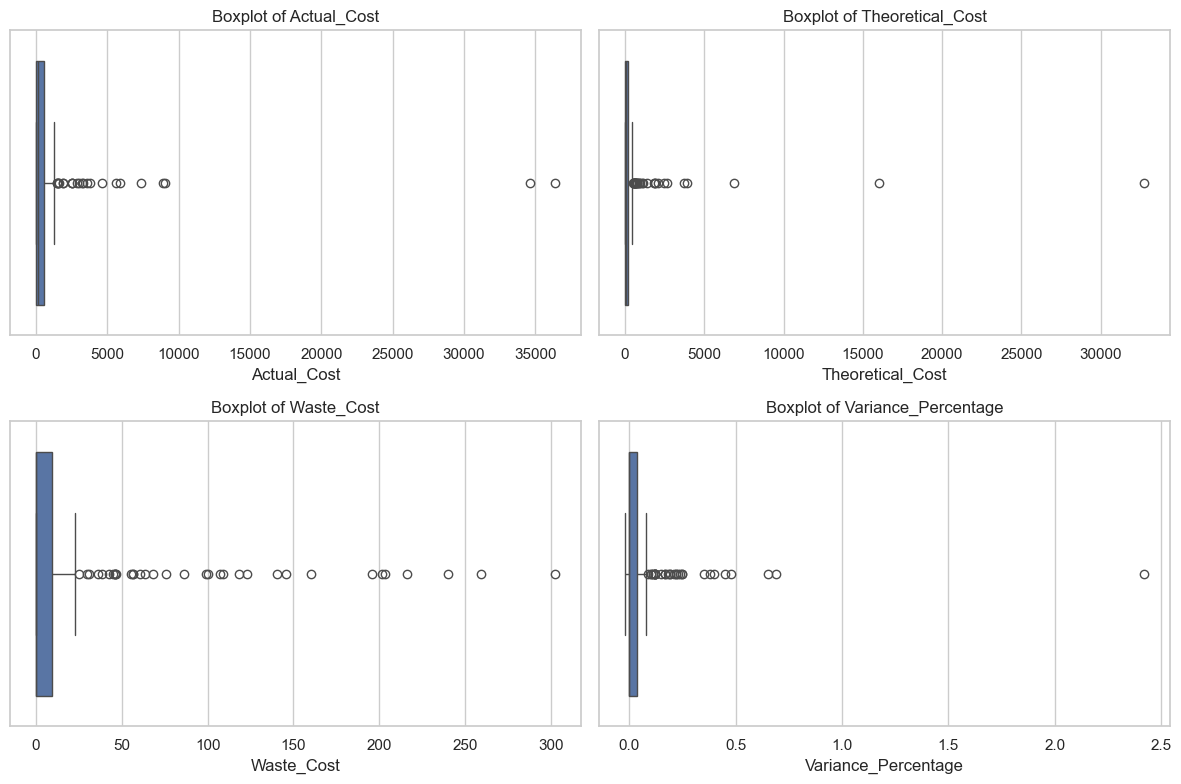

In [7]:
# Checking for outliers

fig, ax = plt.subplots(2, 2, figsize=(12, 8))
ax = ax.flatten()

for i, col in enumerate(numerical_columns):
    sns.boxplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [8]:
# Outlier detection using IQR

def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound


columns_to_check = ['Actual_Cost', 'Theoretical_Cost', 'Waste_Cost', 'Variance_Percentage']
for col in columns_to_check:
    lb, ub = detect_outliers_iqr(df[col])
    print(f"{col}: Lower Bound = {lb}, Upper Bound = {ub}")


Actual_Cost: Lower Bound = -731.575, Upper Bound = 1300.305
Theoretical_Cost: Lower Bound = -271.95000000000005, Upper Bound = 453.25000000000006
Waste_Cost: Lower Bound = -13.6575, Upper Bound = 22.762500000000003
Variance_Percentage: Lower Bound = -0.052500000000000005, Upper Bound = 0.08750000000000001


In [9]:
# Capping outliers
for col in columns_to_check:
    lb, ub = detect_outliers_iqr(df[col])
    df[col] = np.where(df[col] > ub, ub, np.where(df[col] < lb, lb, df[col]))

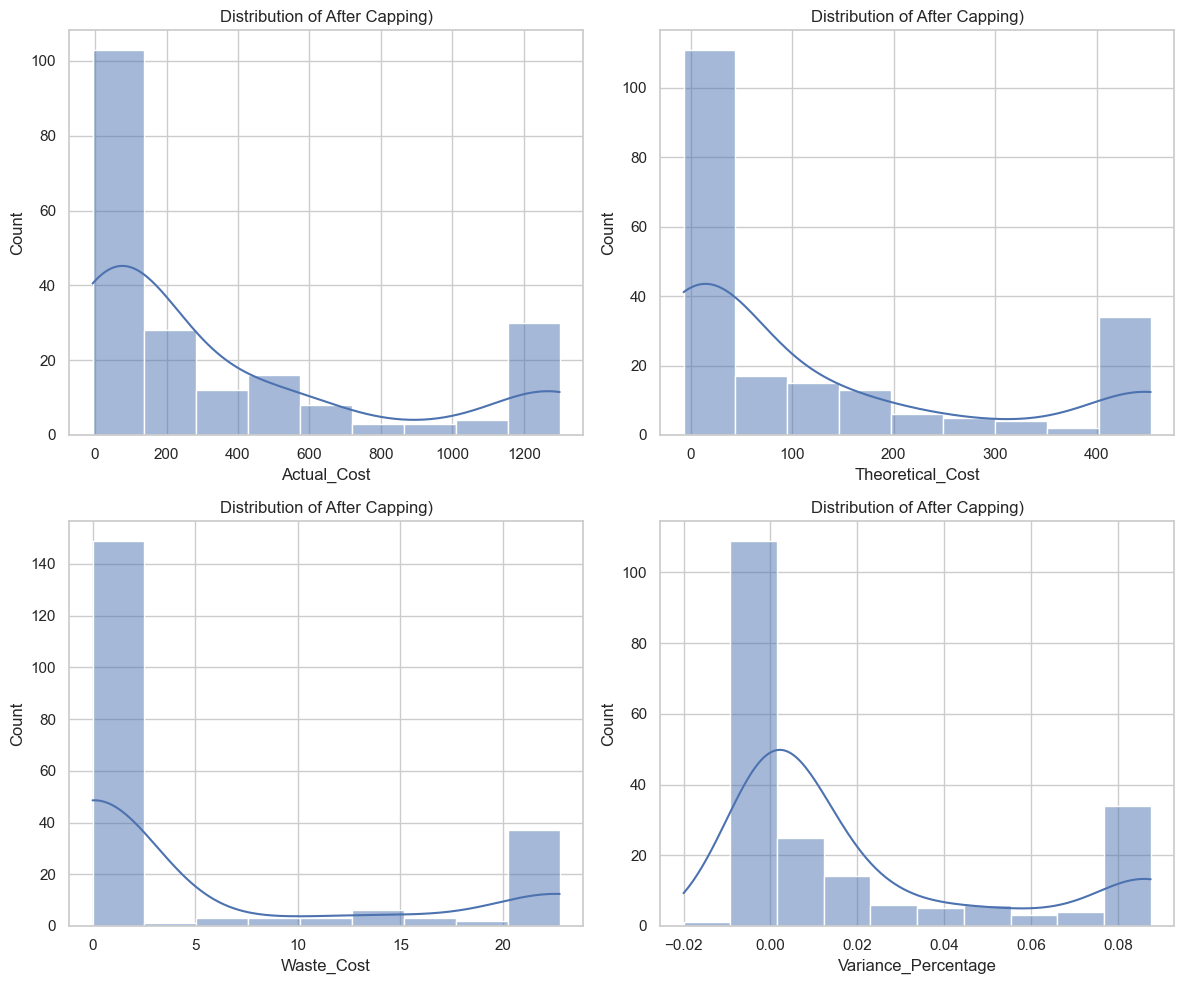

In [10]:
# plt.figure(figsize=(8, 6))
# sns.histplot(df['Actual_Cost'], kde=True, bins=50, color='blue')
# plt.title('Distribution of Actual_Cost (After Capping)')
# plt.xlabel('Actual_Cost')
# plt.ylabel('Frequency')
# plt.show()

# sns.set(style="whitegrid")

numerical_columns = ['Actual_Cost', 'Theoretical_Cost', 'Waste_Cost', 'Variance_Percentage']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, col in enumerate(numerical_columns):
    ax = axes[i // 2, i % 2]
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title("Distribution of After Capping)")

plt.tight_layout()
plt.show()

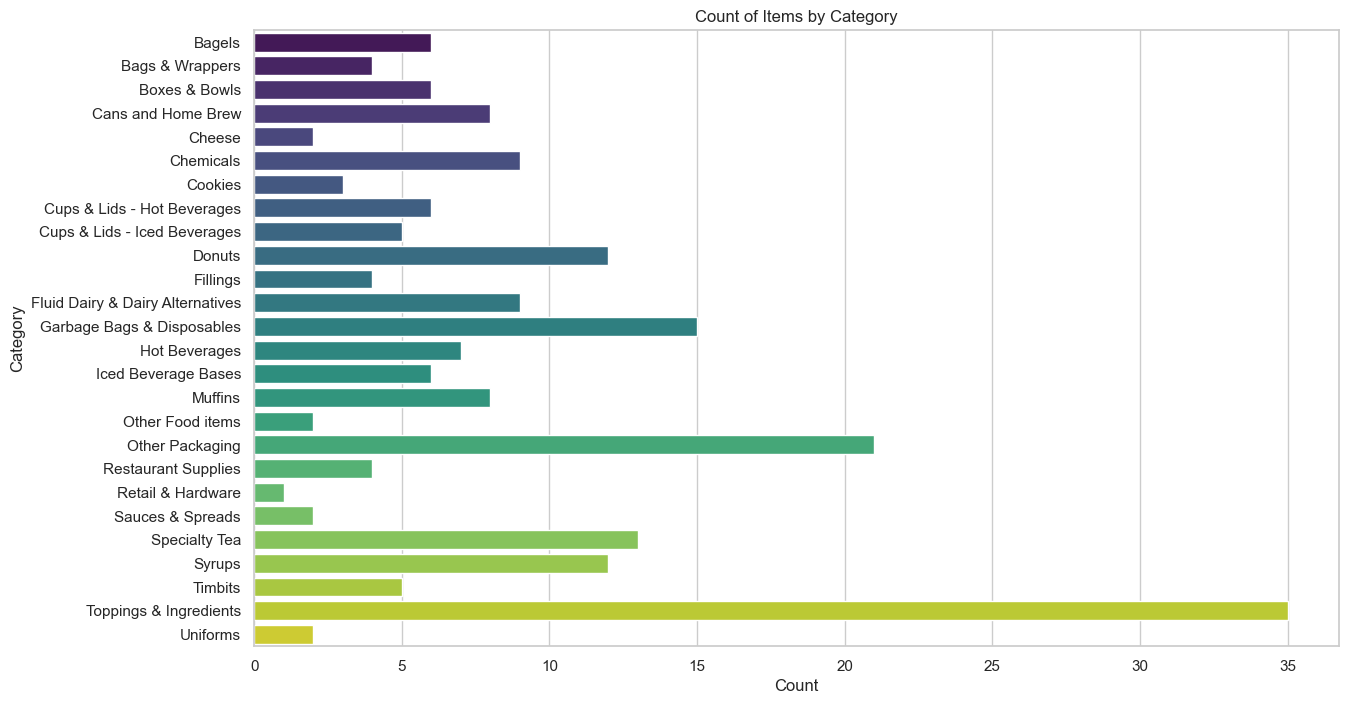

In [12]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, y='Category', palette="viridis")
plt.title("Count of Items by Category")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

### Bivariate Analysis

In [ ]:
df.columns

Index(['Category', 'Inventory_Item', 'Pack_Size', 'Price_Per_Unit',
       'Open_Count', 'Purchases', 'Transfers', 'Close_Count', 'Actual_Units',
       'Theoretical_Units', 'Waste_Units', 'Variance_Units', 'Actual_Cost',
       'Theoretical_Cost', 'Waste_Cost', '$ Var', 'Variance_Percentage',
       'Actual_Cost_log', 'Theoretical_Cost_log', 'Waste_Cost_log',
       'Variance_Percentage_log'],
      dtype='object')

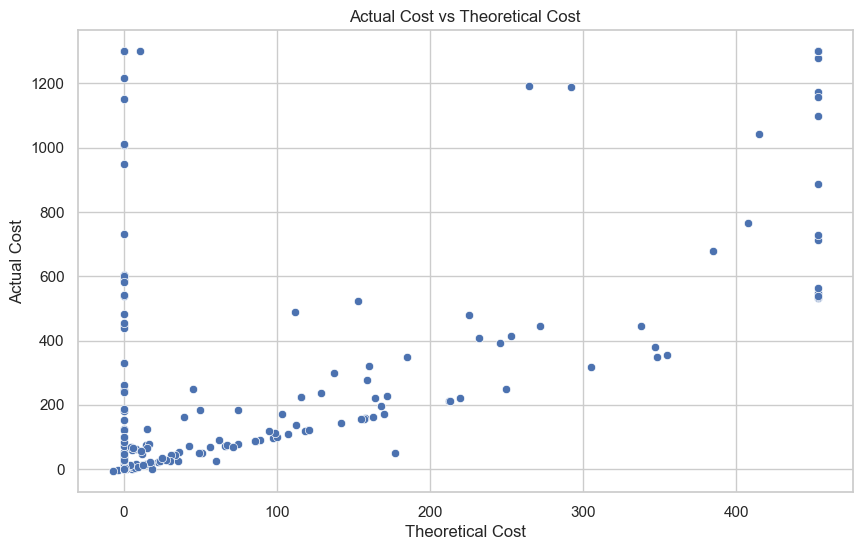

In [ ]:
# Actual Cost Vs Theoretical Cost
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Theoretical_Cost', y='Actual_Cost')
plt.title("Actual Cost vs Theoretical Cost")
plt.xlabel("Theoretical Cost")
plt.ylabel("Actual Cost")
plt.show()

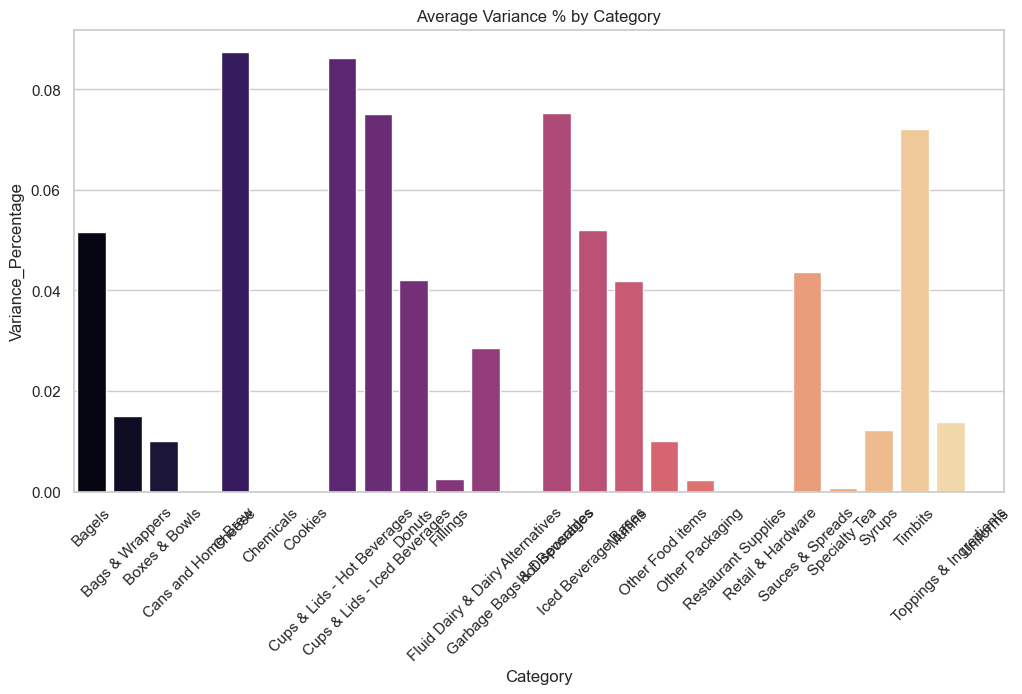

In [15]:
# Variance % by Category
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Category', y='Variance_Percentage', ci=None, palette="magma")
plt.title("Average Variance % by Category")
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Variance_Percentage")
plt.show()

### Multivariate Analysis

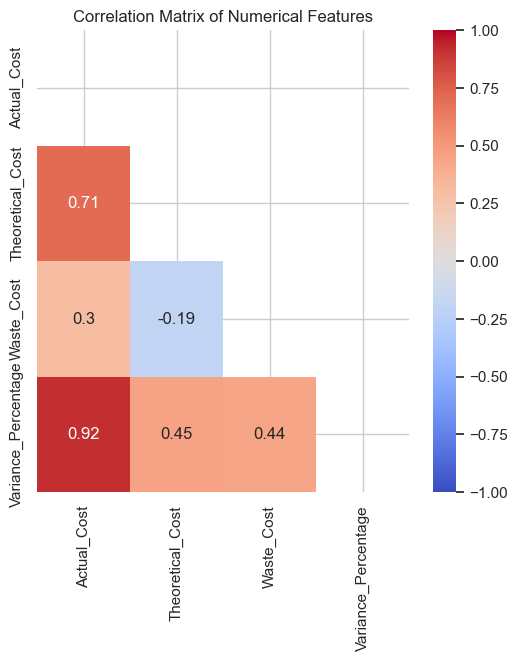

In [ ]:
# Heatmap for numerical features

mask = np.triu(np.ones_like(df[numerical_columns].corr(), dtype=bool))

plt.figure(figsize=(6, 6))
sns.heatmap(df[numerical_columns].corr(), mask= mask, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [17]:
df.columns

Index(['Category', 'Inventory_Item', 'Pack_Size', 'Price_Per_Unit',
       'Open_Count', 'Purchases', 'Transfers', 'Close_Count', 'Actual_Units',
       'Theoretical_Units', 'Waste_Units', 'Variance_Units', 'Actual_Cost',
       'Theoretical_Cost', 'Waste_Cost', '$ Var', 'Variance_Percentage'],
      dtype='object')

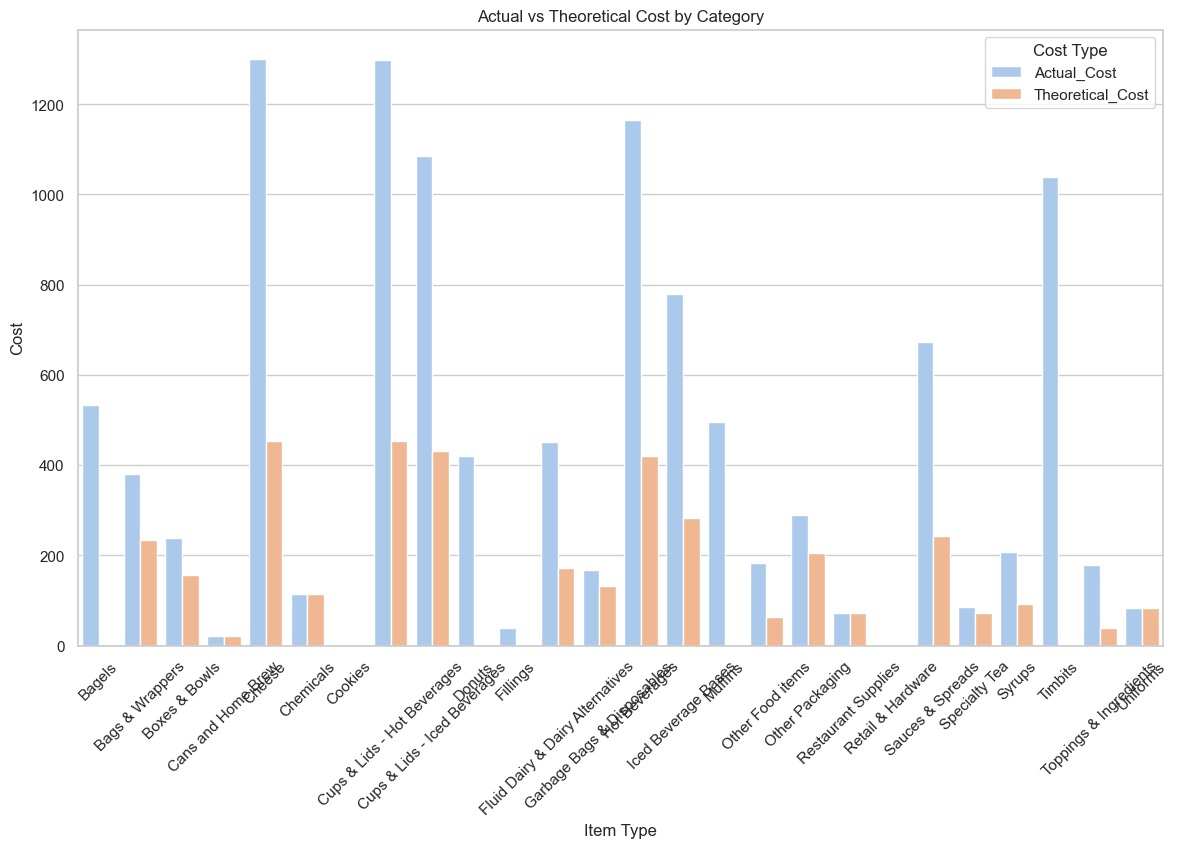

In [18]:
df_melted = df.melt(id_vars=["Category"], value_vars=["Actual_Cost", "Theoretical_Cost"], 
                    var_name="Cost Type", value_name="Cost")


plt.figure(figsize=(14, 8))
sns.barplot(data=df_melted, x="Category", y="Cost", hue="Cost Type", ci=None, palette="pastel")
plt.title("Actual vs Theoretical Cost by Category")
plt.xticks(rotation=45)
plt.xlabel("Item Type")
plt.ylabel("Cost")
plt.legend(title="Cost Type")
plt.show()

### Advanced EDA:

In [28]:
# Grouping by 'Category' and calculating the sum for each cost column
top_categories = df.groupby('Category')[['Waste_Cost', 'Actual_Cost', 'Theoretical_Cost']].sum()

# Sorting each column in descending order and select the top 10
top_waste_cost = top_categories.sort_values(by='Waste_Cost', ascending=False).head(10)
top_actual_cost = top_categories.sort_values(by='Actual_Cost', ascending=False).head(10)
top_theoretical_cost = top_categories.sort_values(by='Theoretical_Cost', ascending=False).head(10)


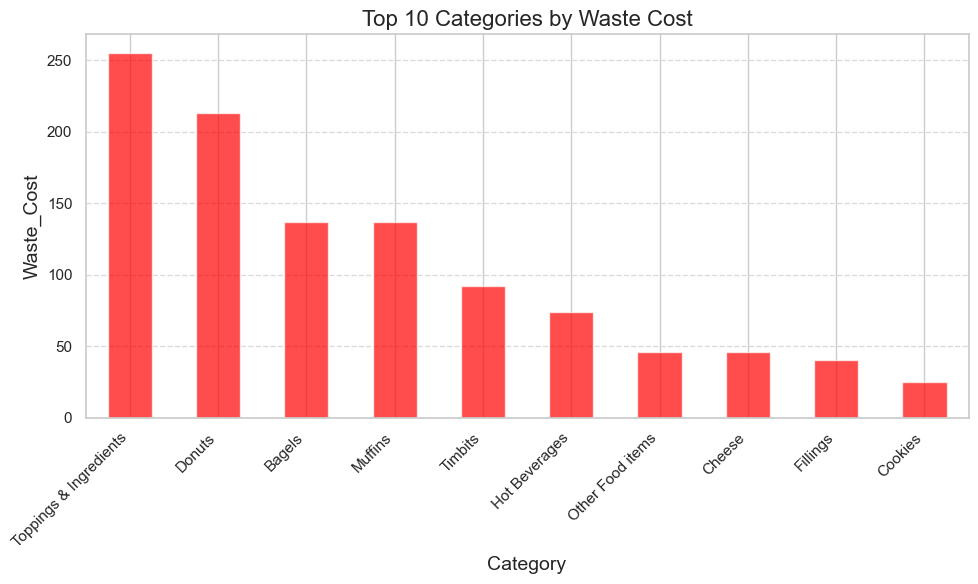

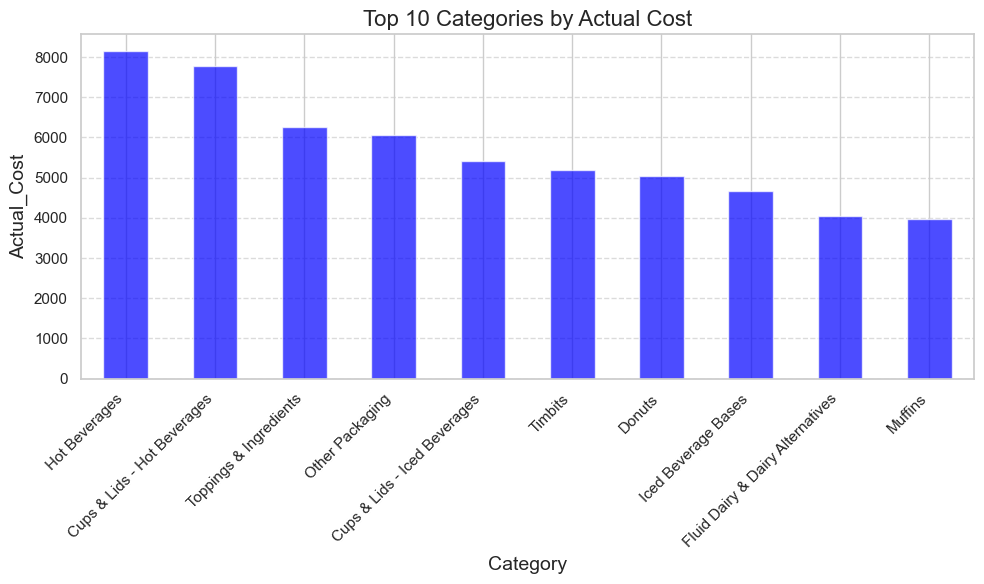

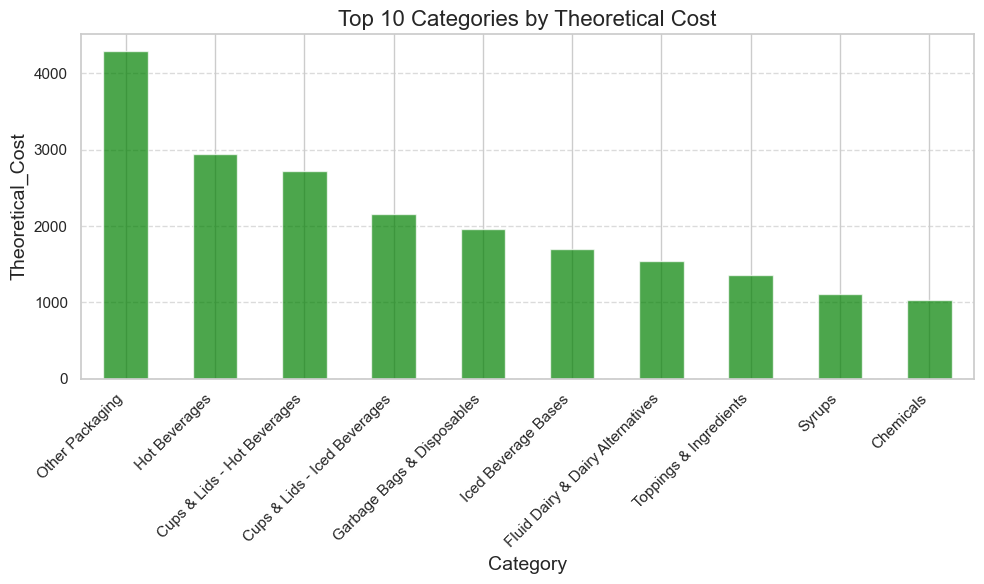

In [ ]:
# Plotting Top 10 Categories for Each Cost Type

import matplotlib.pyplot as plt


def plot_top_categories(data, column, title, color):
    plt.figure(figsize=(10, 6))
    data[column].plot(kind='bar', color=color, alpha=0.7)
    plt.title(title, fontsize=16)
    plt.xlabel('Category', fontsize=14)
    plt.ylabel(column, fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


plot_top_categories(top_waste_cost, 'Waste_Cost', 'Top 10 Categories by Waste Cost', 'red')
plot_top_categories(top_actual_cost, 'Actual_Cost', 'Top 10 Categories by Actual Cost', 'blue')
plot_top_categories(top_theoretical_cost, 'Theoretical_Cost', 'Top 10 Categories by Theoretical Cost', 'green')